# 1A.soft : Tests unitaires, setup et ingéniérie logiciel

On vérifie toujours qu'un code fonctionne quand on l'écrit mais cela ne veut pas dire qu'il continuera à fonctionner à l'avenir. La robustesse d'un code vient de tout ce qu'on fait autour pour s'assurer qu'il continue d'exécuter correctement.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
from pyensae.graph_helper import draw_diagram

## Petite histoire

Supposons que vous ayez implémenté trois fonctions qui dépendent les unes des autres. la fonction ``f3`` utilise les fonctions ``f1`` et ``f2``.

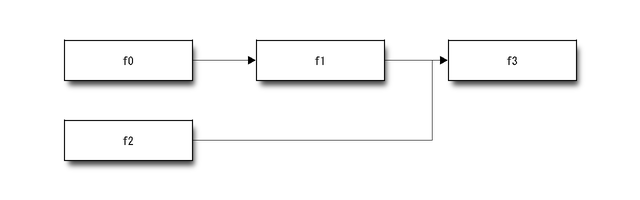

In [ ]:
draw_diagram("blockdiag { f0 -> f1 -> f3; f2 -> f3;}")

Six mois plus tard, vous créez une fonction ``f5`` qui appelle une fonction ``f4`` et la fonction ``f2``.

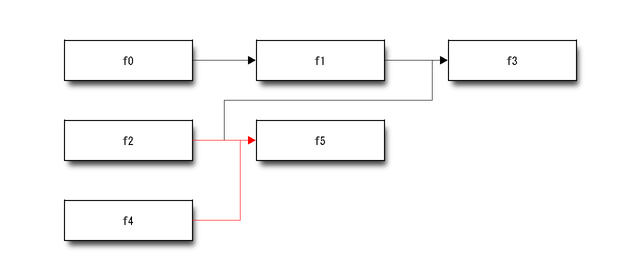

In [ ]:
draw_diagram('blockdiag { f0 -> f1 -> f3; f2 -> f3; f2 -> f5 [color="red"]; f4 -> f5 [color="red"]; }')

Ah au fait, ce faisant, vous modifiez la fonction ``f2`` et vous avez un peu oublié ce que faisait la fonction ``f3``... Bref, vous ne savez pas si la fonction ``f3`` sera impactée par la modification introduite dans la fonction ``f2`` ? C'est ce type de problème qu'on rencontre tous les jours quand on écrit un logiciel à plusieurs et sur une longue durée. Ce notebook présente les briques classiques pour s'assurer de la robustesse d'un logiciel.

* les tests unitaires
* un logiciel de suivi de source
* calcul de couverture
* l'intégration continue
* écrire un setup
* écrire la documentation
* publier sur [PyPi](https://pypi.python.org/pypi)

## Ecrire une fonction

N'importe quel fonction qui fait un calcul, par exemple une fonction qui résoud une équation du second degré.

In [ ]:
def solve_polynom(a, b, c):
    # ....
    return None

## Ecrire un test unitaire

Un [test unitaire](https://fr.wikipedia.org/wiki/Test_unitaire) est une fonction qui s'assure qu'une autre fonction retourne bien le résultat souhaité. Le plus simple est d'utiliser le module standard [unittest](https://docs.python.org/3/library/unittest.html) et de quitter les notebooks pour utiliser des fichiers. Parmi les autres alternatives : [pytest](https://docs.pytest.org/en/latest/) et [nose](http://nose.readthedocs.io/en/latest/).

## Couverture ou coverage

La [couverture de code](https://fr.wikipedia.org/wiki/Couverture_de_code) est l'ensemble des lignes exécutées par les tests unitaires. Cela ne signifie pas toujours qu'elles soient correctes mais seulement qu'elles ont été exécutées une ou plusieurs sans provoquer d'erreur. Le module le plus simple est [coverage](https://coverage.readthedocs.io/en/coverage-4.4.1/). Il produit des rapports de ce type : [mlstatpy/coverage](https://codecov.io/github/sdpython/mlstatpy?branch=master).

## Créer un compte GitHub

[GitHub](https://github.com/) est un site qui contient la majorité des codes des projets open-source. Il faut créer un compte si vous n'en avez pas, c'est gratuit pour les projets open souce, puis créer un projet et enfin y insérer votre projet. Votre ordinateur a besoin de :

* [git](https://git-scm.com/)
* [GitHub destkop](https://desktop.github.com/)

Vous pouvez lire [GitHub Pour les Nuls : Pas de Panique, Lancez-Vous ! (Première Partie)](https://www.christopheducamp.com/2013/12/15/github-pour-nuls-partie-1/) et bien sûr faire plein de recherches internet.

**Note**

Tout ce que vous mettez sur GitHub pour un projet open-source est en accès libre. Veillez à ne rien mettre de personnel. Un compte GitHub fait aussi partie des choses qu'un recruteur ira regarder en premier.

## Intégration continue

L'[intégration continue](https://fr.wikipedia.org/wiki/Int%C3%A9gration_continue) a pour objectif de réduire le temps entre une modification et sa mise en production. Typiquement, un développeur fait une modification, une machine exécute tous les tests unitaires. On en déduit que le logiciel fonctionne sous tous les angles, on peut sans crainte le mettre à disposition des utilisateurs. Si je résume, l'intégration continue consiste à lancer une batterie de tests dès qu'une modification est détectée. Si tout fonctionne, le logiciel est construit et prêt à être partagé ou déployé si c'est un site web.


Là encore pour des projets open-source, il est possible de trouver des sites qui offre ce service gratuitement :

* [travis](https://travis-ci.org/) - [Linux](https://fr.wikipedia.org/wiki/Linux)
* [appveyor](https://www.appveyor.com/) - [Windows](https://fr.wikipedia.org/wiki/Microsoft_Windows) - 1 job à la fois, pas plus d'une heure.
* [circle-ci](https://circleci.com/) - [Linux](https://fr.wikipedia.org/wiki/Linux) et [Mac OSX](https://fr.wikipedia.org/wiki/MacOS) (payant)
* [GitLab-ci](https://about.gitlab.com/features/gitlab-ci-cd/)

A part [GitLab-ci](https://about.gitlab.com/features/gitlab-ci-cd/), ces trois services font tourner les tests unitaires sur des machines hébergés par chacun des sociétés. Il faut s'enregistrer sur le site, définir un fichier [.travis.yml](https://docs.travis-ci.com/user/customizing-the-build), [.appveyor.yml](https://www.appveyor.com/docs/appveyor-yml/) ou [circle.yml](https://circleci.com/docs/1.0/config-sample/) puis activer le projet sur le site correspondant. Quelques exemples sont disponibles à [pyquickhelper](https://github.com/sdpython/pyquickhelper) ou [scikit-learn](https://github.com/scikit-learn/scikit-learn). Le fichier doit être ajouté au projet sur *GitHub* et activé sur le site d'intégration continue choisi. La moindre modification déclenchera un nouveau *build*.permet

La plupart des sites permettent l'insertion de [badge](https://docs.travis-ci.com/user/status-images/) de façon à signifier que le *build* fonctionne.

In [ ]:
from IPython.display import SVG
SVG("https://travis-ci.org/sdpython/ensae_teaching_cs.svg?branch=master")

In [ ]:
SVG("https://codecov.io/github/sdpython/ensae_teaching_cs/coverage.svg?branch=master")

Il y a des badges un peu pour tout.

## Ecrire un setup

Le fichier ``setup.py`` détermin la façon dont le module python doit être installé pour un utilisateur qui ne l'a pas développé. Comment construire un setup : [setup](https://docs.python.org/3.6/distutils/setupscript.html).

## Ecrire la documentation

L'outil est le plus utilisé est [sphinx](http://www.sphinx-doc.org/en/stable/). Saurez-vous l'utiliser ?

## Dernière étape : PyPi

[PyPi](https://pypi.python.org/pypi) est un serveur qui permet de mettre un module à la disposition de tout le monde. Il suffit d'uploader le module... [Packaging and Distributing Projects](https://packaging.python.org/tutorials/distributing-packages/) ou [How to submit a package to PyPI](http://peterdowns.com/posts/first-time-with-pypi.html). PyPi permet aussi l'insertion de badge.

In [ ]:
SVG("https://badge.fury.io/py/ensae_teaching_cs.svg")